In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import chromedriver_binary
import csv
import re
import japanize_matplotlib

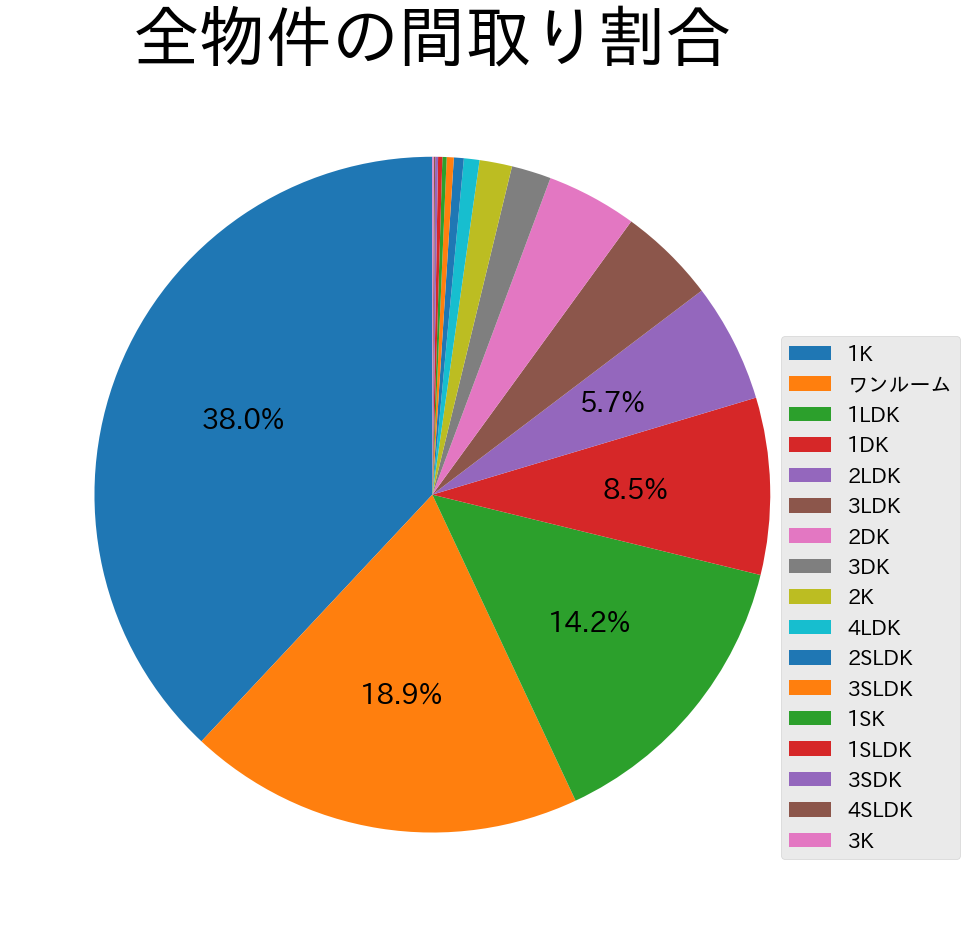

In [2]:
# 間取りの割合
df = pd.read_csv("ふれんず物件スクレイピング情報.csv")
plt.figure(figsize = (10,10))
textprops = {"fontsize":20}

plt.title('全物件の間取り割合',fontsize= 48)
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("tab20").colors)

plt.pie(df["間取り"].value_counts(),
        textprops=textprops,
        autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '',
        startangle=90)
plt.legend(df["間取り"].value_counts().index,
           bbox_to_anchor=(0.9, 0.7))
plt.tight_layout()
plt.savefig("全物件の間取り割合.png")
plt.show()



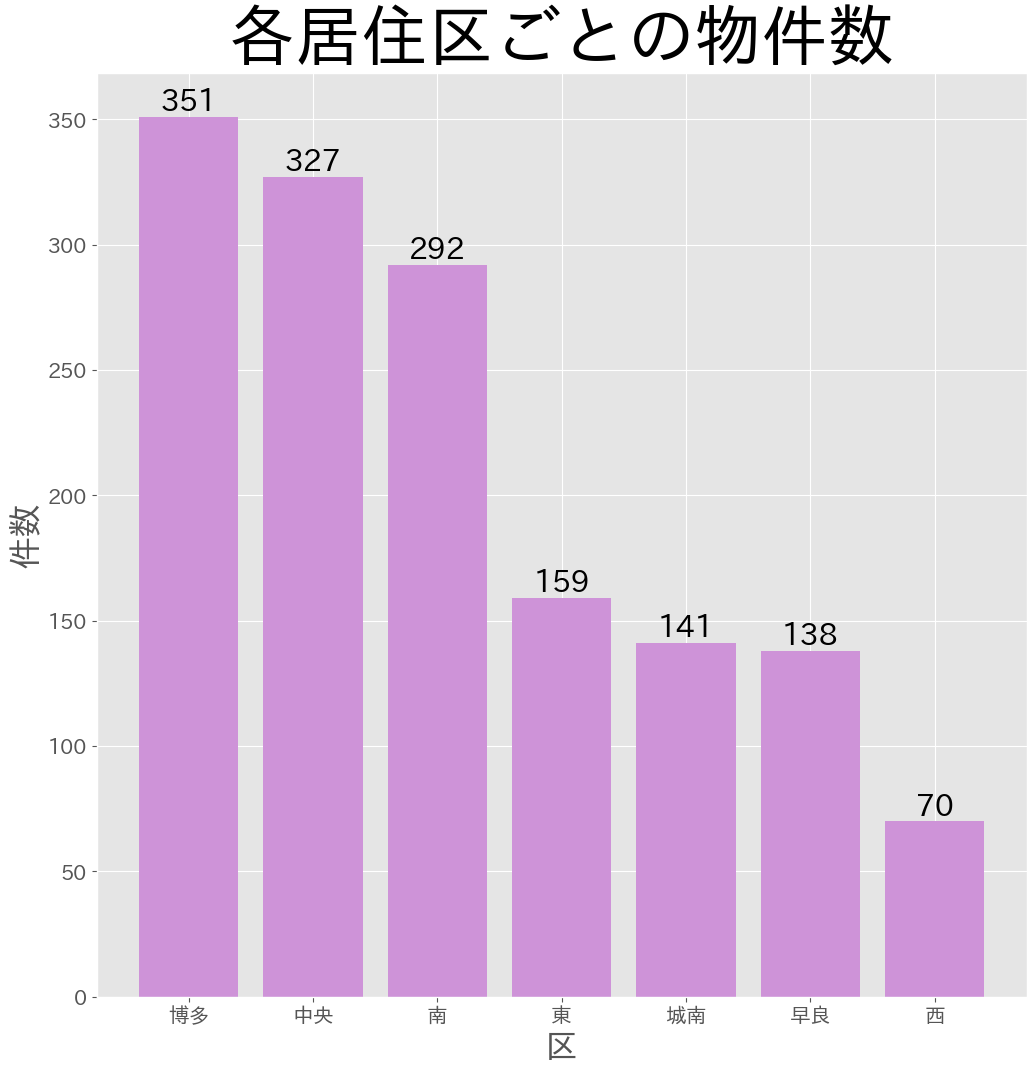

In [3]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")

df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1]) 
plt.style.use('ggplot')

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(12,12))

plt.title('各居住区ごとの物件数',fontsize= 48)
plt.xlabel('区', fontsize= 24)
plt.ylabel('件数', fontsize= 24)

plt.bar(df["市区"].value_counts().index,df["市区"].value_counts(),
        color="#CE93D8")

# 棒グラフ内に数値を書く
for x, y in zip(df["市区"].value_counts().index,df["市区"].value_counts()):
    y = round(y, 2)
    plt.text(x, y, y, ha='center', va='bottom',size = "x-large")
    
plt.savefig("各居住区ごとの物件数.png")
plt.show()


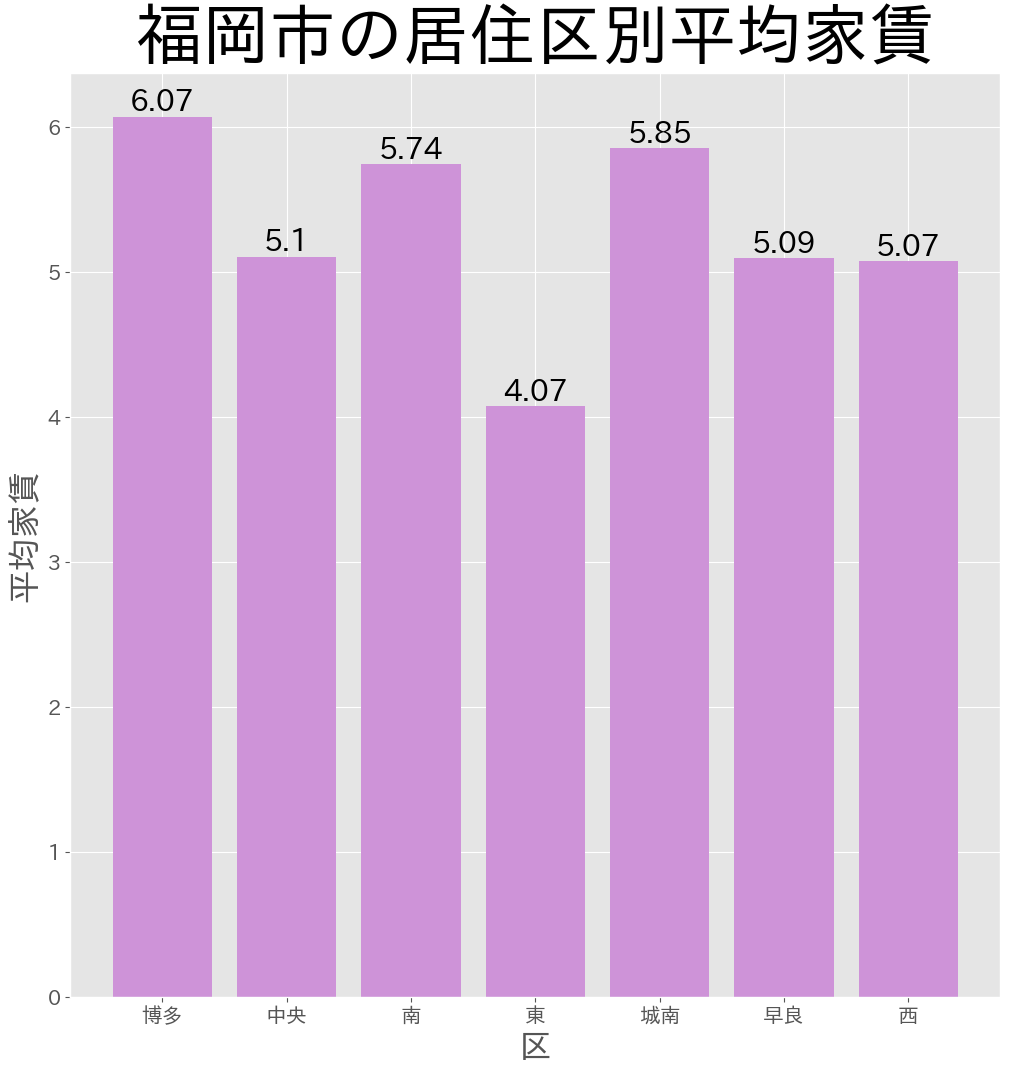

In [4]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1]) 
plt.style.use('ggplot')

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(12,12))

plt.title('福岡市の居住区別平均家賃',fontsize= 48)
plt.xlabel('区', fontsize= 24)
plt.ylabel('平均家賃', fontsize= 24)
plt.bar(df["市区"].value_counts().index,df.groupby("市区").mean()["家賃"],
        color="#CE93D8")


# 棒グラフ内に数値を書く
for x, y in zip(df["市区"].value_counts().index, df.groupby("市区").mean()["家賃"]):
    y = round(y, 2)
    plt.text(x, y, y, ha='center', va='bottom',size = "x-large")

plt.savefig("福岡市の居住区別平均家賃.png")
plt.show()



<Figure size 1200x1200 with 0 Axes>

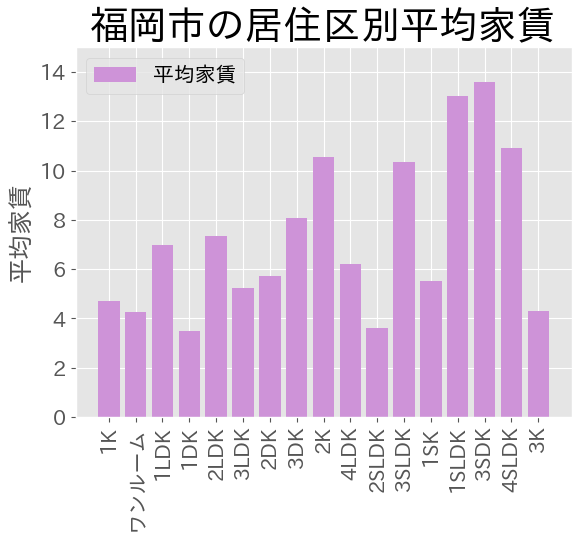

In [19]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1])
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(12,12))

fig, ax1 = plt.subplots()
plt.xticks(rotation=90)
plt.title('福岡市の居住区別平均家賃',fontsize= 28)
ax1.bar(df["間取り"].value_counts().index,df.groupby("間取り").mean()["家賃"],
        color="#CE93D8")              
ax1.set_ylabel('平均家賃')             
ax1.set_ylim(0, 15)

plt.show()

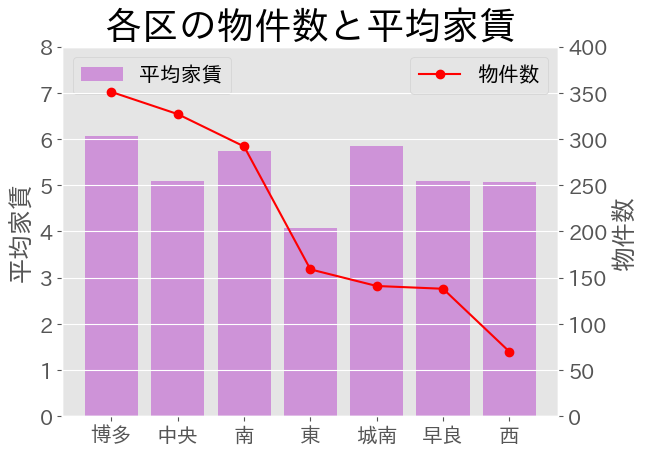

In [22]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1]) 
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

fig, ax1 = plt.subplots()
plt.title('各区の物件数と平均家賃',fontsize= 27)
ax1.bar(df["市区"].value_counts().index,df.groupby("市区").mean()["家賃"],
        color="#CE93D8")              
ax1.set_ylabel('平均家賃')             
ax1.set_ylim(0, 8)
ax1.legend(['平均家賃'], loc='upper left')

# グラフ２
ax2 = ax1.twinx()
ax2.plot(df["市区"].value_counts().index,df["市区"].value_counts(),'ro-',)
ax2.set_ylabel('物件数')
ax2.legend(['物件数'], loc='upper right')
ax2.set_ylim(0, 400)
ax1.grid()      

plt.savefig(".png")
plt.show()

In [25]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")
df['築年'] = df['築年月'].apply(lambda x: re.split('\[', x)[0]) 
plt.style.use('ggplot')

print(df["築年"])

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(12,12))




0       1986
1       2001
2       1987
3       1992
4       1979
        ... 
1473    1990
1474    1991
1475    1984
1476    2003
1477    2016
Name: 築年, Length: 1478, dtype: object


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [15]:
# 間取りの割合

# 書き込み
with open('博多.csv', 'w') as csv_file:
    fieldnames = ['家賃','物件番号','情報更新日','次回更新予定日','所在地','建物名','沿線・駅・交通','専有面積','専用庭面積','間取り','間取り内訳','バルコニー','サービスルーム数'
                 ,'小学校区','中学校区','駐車場','駐車場：形式','駐車場：状況','駐車場備考','駐車場敷金','敷金','礼金','精算方式','保証金','保証金償却','管理費','共益費'
                 ,'雑費','家賃保証会社','家賃保証・保証費用等','保険','更新料','その他一時金','施設費用','その他費用','賃貸借区分','契約期間','特優賃区分','管理員の勤務形態','敷地延長','建物構造'
                 ,'建物工法','最適用途','階建','階','築年月','現況','入居可能時期','設備','特記事項','備考','取引態様','担当者','担当者連絡先','市区'] # 54
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

df = pd.read_csv("ふれんず物件スクレイピング情報.csv")
plt.figure(figsize = (10,10))
textprops = {"fontsize":20}
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1])
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("tab20").colors)

hakata = []

count = 0

for i in range(len(df)):
    if df.loc[i]["市区"] == "博多":
        hakata.append(df.loc[i])
        # 書き込み
        with open('博多.csv', 'a') as csv_file:
            contents = {}
            writer = csv.writer(csv_file)
            writer.writerow(hakata[count].values)
            count+=1

plt.pie(df["間取り"].value_counts(),
textprops=textprops,
autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '',


[家賃                                                          4.8
物件番号                                                   99297068
情報更新日                                               2022年12月06日
次回更新予定日                                             2022年12月20日
所在地                                    福岡市博多区築港本町8-10  周辺mapを見る
建物名                                                   達川ビル  303
沿線・駅・交通       福岡市空港線中洲川端駅 徒歩16分 福岡市箱崎線中洲川端駅 徒歩16分 福岡市箱崎線呉服町駅...
専有面積                                              40㎡ / 約12.10坪
専用庭面積                                                       NaN
間取り                                                         2DK
間取り内訳                                              和 6　洋 6　DK 4
バルコニー                                                       NaN
サービスルーム数                                                    NaN
小学校区                                                        NaN
中学校区                                                        NaN
駐車場                                    

<Figure size 1000x1000 with 0 Axes>